In [2]:
#读取csv
import pandas as pd
data = pd.read_csv('data1.csv',index_col=0,header=0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 31 columns):
y                         10000 non-null float64
age                       10000 non-null float64
xaccount_age              10000 non-null float64
cred_limit                10000 non-null float64
this_bill_rate            10000 non-null float64
this_bill_mp              10000 non-null float64
last_mp_days              10000 non-null float64
six_bill_num              10000 non-null float64
six_bill_avg_amt          10000 non-null float64
six_cycle_mp_num          10000 non-null float64
six_cycle_mp_avg_amt      10000 non-null float64
six_bill_avg_debt_rate    10000 non-null float64
six_bill_low_repay_num    10000 non-null float64
epp_nbr_12m               10000 non-null float64
alop_nbr_12m              10000 non-null float64
epp_avg_amt_12m           10000 non-null float64
alop_avg_amt_12m          10000 non-null float64
consume_num_session12     10000 non-null float64
consume_nu

In [4]:
#统计某一列中各个元素值出现的次数
 #     
#列出数据的偏斜度
#data['age'].skew()    
data.skew(axis=0)

y                          1.504137
age                        0.851581
xaccount_age               1.574035
cred_limit                 3.842362
this_bill_rate             7.192468
this_bill_mp               5.887709
last_mp_days              -0.590304
six_bill_num              -1.887917
six_bill_avg_amt           5.930888
six_cycle_mp_num           3.033177
six_cycle_mp_avg_amt       9.530334
six_bill_avg_debt_rate     6.798778
six_bill_low_repay_num     1.735169
epp_nbr_12m                9.103644
alop_nbr_12m               5.872629
epp_avg_amt_12m            7.192508
alop_avg_amt_12m           6.559339
consume_num_session12      6.615223
consume_num_session6       6.073693
consume_num_session3       5.555605
consume_num_session        5.077336
consume_amt_session12      7.277413
consume_amt_session6       8.140547
consume_amt_session3       8.230701
consume_amt_session        6.189696
month_avg_use_year        47.581714
month_avg_use_month6      52.840025
month_avg_use_month3      20

In [6]:
#列出数据的峰度
data.kurt(axis=0)

y                            0.262482
age                          0.549048
xaccount_age                 1.400312
cred_limit                  26.044153
this_bill_rate             179.417054
this_bill_mp                83.385741
last_mp_days                -1.642268
six_bill_num                 2.136684
six_bill_avg_amt            72.432564
six_cycle_mp_num             9.725622
six_cycle_mp_avg_amt       155.247762
six_bill_avg_debt_rate     105.519806
six_bill_low_repay_num       2.066650
epp_nbr_12m                190.308442
alop_nbr_12m                63.282674
epp_avg_amt_12m             80.142424
alop_avg_amt_12m            59.068284
consume_num_session12       65.074680
consume_num_session6        57.395132
consume_num_session3        45.908120
consume_num_session         36.137231
consume_amt_session12      102.712301
consume_amt_session6       148.921560
consume_amt_session3       156.592453
consume_amt_session         88.098473
month_avg_use_year        3179.345645
month_avg_us

In [5]:
#异常值分析
data.columns

Index(['y', 'city', 'mar_status', 'age', 'xaccount_age', 'cred_limit',
       'this_bill_rate', 'this_bill_mp', 'last_mp_days', 'six_bill_num',
       'six_bill_avg_amt', 'six_cycle_mp_num', 'six_cycle_mp_avg_amt',
       'six_bill_avg_debt_rate', 'six_bill_low_repay_num', 'epp_nbr_12m',
       'alop_nbr_12m', 'epp_avg_amt_12m', 'alop_avg_amt_12m',
       'consume_num_session12', 'consume_num_session6', 'consume_num_session3',
       'consume_num_session', 'consume_amt_session12', 'consume_amt_session6',
       'consume_amt_session3', 'consume_amt_session', 'month_avg_use_year',
       'month_avg_use_month6', 'month_avg_use_month3'],
      dtype='object')

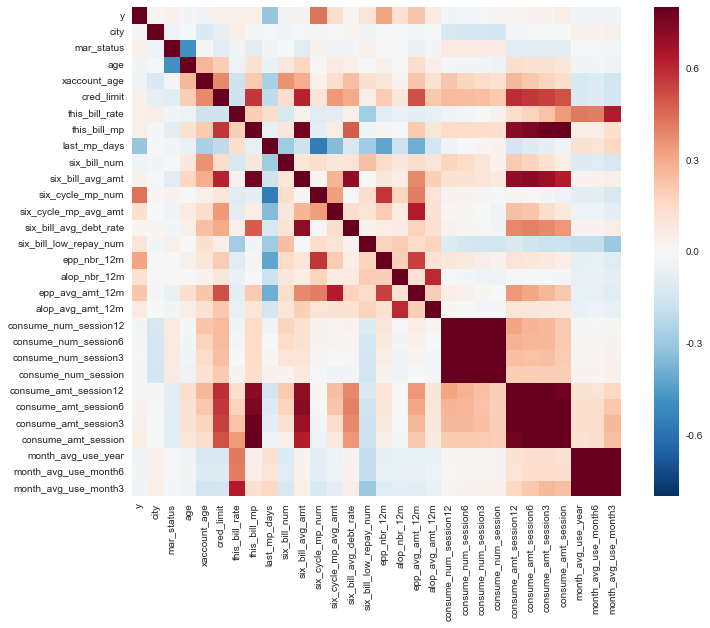

In [6]:
# 载入seaborn作图
import seaborn as sns
import re  # Regular Expression operations
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#计算所有特征值每两个之间的相关系数，并作图表示。
corrmat = data.corr()#得到相关系数
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)#热点图

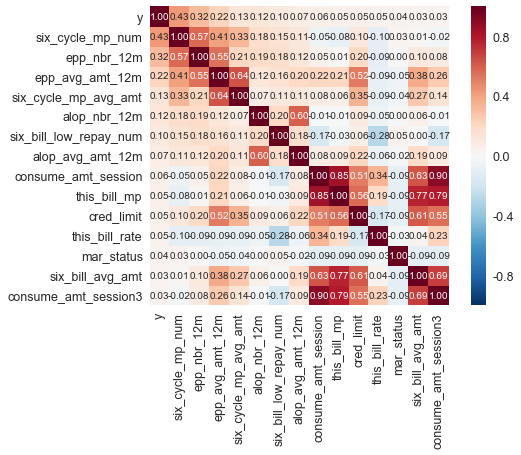

In [7]:
#取出相关性最大的前十个，做出热点图表示
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'y')['y'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',     annot_kws={'size': 10}, yticklabels=cols.values,    xticklabels=cols.values)
plt.show()

https://blog.csdn.net/zllnau66/article/details/81742798

python3常用的数据清洗方法

In [24]:
#首先载入各种包
import pandas as pd
import numpy as np
from collections import Counter
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题


In [25]:
#导入数据
#读取csv
import pandas as pd
data = pd.read_csv('data1.csv',index_col=0,header=0)

In [27]:
#观察数据
data.head()  #查看长啥样

,y,city,mar_status,age,xaccount_age,cred_limit,this_bill_rate,this_bill_mp,last_mp_days,six_bill_num,...,consume_num_session6,consume_num_session3,consume_num_session,consume_amt_session12,consume_amt_session6,consume_amt_session3,consume_amt_session,month_avg_use_year,month_avg_use_month6,month_avg_use_month3
0,0.0,52.0,0.0,32.0,10.0,20000.0,0.162971,1213.15,15.0,6.0,...,17.0,12.0,2.0,70173.00,29294.00,16773.00,1249.0,0.350865,0.244117,0.279550
1,0.0,84.0,2.0,28.0,17.0,2500.0,0.000000,2165.66,9999.0,6.0,...,15.0,3.0,0.0,19515.38,3475.60,3130.88,0.0,0.661538,0.231707,0.417451
2,0.0,35.0,0.0,34.0,17.0,28500.0,0.792989,21336.18,9999.0,6.0,...,96.0,47.0,15.0,206655.62,114284.77,78978.75,22600.2,0.731524,0.703291,0.923728
3,0.0,40.0,0.0,28.0,17.0,5000.0,1.001600,4668.30,9999.0,6.0,...,37.0,15.0,5.0,227540.00,87870.00,14900.00,5000.0,0.948083,0.976333,0.993333
4,0.0,21.0,2.0,26.0,19.0,60000.0,0.990300,56447.10,9999.0,6.0,...,70.0,57.0,40.0,549835.93,290014.88,176430.00,59418.0,0.872755,0.878833,0.980167


In [28]:
data.shape  #查看数据的行列大小

(10000, 30)

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
y,10000.0,0.199500,0.399644,0.000000,0.000000,0.000000,0.000000,1.000000e+00
city,10000.0,60.699400,42.824365,0.000000,18.000000,57.000000,96.000000,1.390000e+02
mar_status,10000.0,0.675400,0.929796,0.000000,0.000000,0.000000,2.000000,2.000000e+00
age,10000.0,33.778400,7.950498,19.000000,28.000000,32.000000,38.000000,7.400000e+01
xaccount_age,10000.0,23.422200,26.014358,1.000000,7.000000,14.000000,23.000000,1.450000e+02
cred_limit,10000.0,28197.198900,36234.316972,1.000000,6500.000000,18000.000000,35000.000000,5.000000e+05
this_bill_rate,10000.0,0.482938,0.479739,0.000000,0.111086,0.386447,0.835856,1.697924e+01
this_bill_mp,10000.0,10328.012341,16418.660196,0.000000,1613.560000,4692.610000,13298.132500,4.669180e+05
last_mp_days,10000.0,6500.546500,4668.516588,1.000000,272.000000,9999.000000,9999.000000,9.999000e+03
six_bill_num,10000.0,5.258700,1.485932,1.000000,5.000000,6.000000,6.000000,6.000000e+00


In [31]:
#列级别的判断,但凡某一列有null值或空的，则为真
data.isnull().any()

y                         False
city                      False
mar_status                False
age                       False
xaccount_age              False
cred_limit                False
this_bill_rate            False
this_bill_mp              False
last_mp_days              False
six_bill_num              False
six_bill_avg_amt          False
six_cycle_mp_num          False
six_cycle_mp_avg_amt      False
six_bill_avg_debt_rate    False
six_bill_low_repay_num    False
epp_nbr_12m               False
alop_nbr_12m              False
epp_avg_amt_12m           False
alop_avg_amt_12m          False
consume_num_session12     False
consume_num_session6      False
consume_num_session3      False
consume_num_session       False
consume_amt_session12     False
consume_amt_session6      False
consume_amt_session3      False
consume_amt_session       False
month_avg_use_year        False
month_avg_use_month6      False
month_avg_use_month3      False
dtype: bool

In [32]:
#将列中为空或者null的个数统计出来，并将缺失值最多的排前
total = data.isnull().sum().sort_values(ascending=False)
print(total)

month_avg_use_month3      0
month_avg_use_month6      0
city                      0
mar_status                0
age                       0
xaccount_age              0
cred_limit                0
this_bill_rate            0
this_bill_mp              0
last_mp_days              0
six_bill_num              0
six_bill_avg_amt          0
six_cycle_mp_num          0
six_cycle_mp_avg_amt      0
six_bill_avg_debt_rate    0
six_bill_low_repay_num    0
epp_nbr_12m               0
alop_nbr_12m              0
epp_avg_amt_12m           0
alop_avg_amt_12m          0
consume_num_session12     0
consume_num_session6      0
consume_num_session3      0
consume_num_session       0
consume_amt_session12     0
consume_amt_session6      0
consume_amt_session3      0
consume_amt_session       0
month_avg_use_year        0
y                         0
dtype: int64


In [34]:
#统计重复记录数
data.duplicated().sum()
data.drop_duplicates()

,y,city,mar_status,age,xaccount_age,cred_limit,this_bill_rate,this_bill_mp,last_mp_days,six_bill_num,...,consume_num_session6,consume_num_session3,consume_num_session,consume_amt_session12,consume_amt_session6,consume_amt_session3,consume_amt_session,month_avg_use_year,month_avg_use_month6,month_avg_use_month3
0,0.0,52.0,0.0,32.0,10.0,20000.0,0.162971,1213.15,15.0,6.0,...,17.0,12.0,2.0,70173.00,29294.00,16773.00,1249.00,0.350865,0.244117,0.279550
1,0.0,84.0,2.0,28.0,17.0,2500.0,0.000000,2165.66,9999.0,6.0,...,15.0,3.0,0.0,19515.38,3475.60,3130.88,0.00,0.661538,0.231707,0.417451
2,0.0,35.0,0.0,34.0,17.0,28500.0,0.792989,21336.18,9999.0,6.0,...,96.0,47.0,15.0,206655.62,114284.77,78978.75,22600.20,0.731524,0.703291,0.923728
3,0.0,40.0,0.0,28.0,17.0,5000.0,1.001600,4668.30,9999.0,6.0,...,37.0,15.0,5.0,227540.00,87870.00,14900.00,5000.00,0.948083,0.976333,0.993333
4,0.0,21.0,2.0,26.0,19.0,60000.0,0.990300,56447.10,9999.0,6.0,...,70.0,57.0,40.0,549835.93,290014.88,176430.00,59418.00,0.872755,0.878833,0.980167
5,0.0,1.0,1.0,36.0,138.0,46000.0,0.418607,12171.30,17.0,6.0,...,50.0,9.0,4.0,361647.76,197082.29,106119.00,28091.00,0.655159,0.714066,0.768978
6,0.0,68.0,2.0,27.0,62.0,117500.0,0.384213,42886.73,9999.0,6.0,...,49.0,28.0,6.0,371996.50,229952.50,121303.20,45121.00,0.315251,0.326174,0.344123
7,0.0,44.0,0.0,32.0,8.0,2000.0,0.611850,1161.67,9999.0,5.0,...,11.0,6.0,4.0,3589.81,3589.81,1693.00,1223.70,0.358981,0.358981,0.282167
8,0.0,19.0,0.0,53.0,87.0,80000.0,0.706950,50905.36,193.0,6.0,...,16.0,14.0,4.0,208787.00,152922.00,140842.00,53565.00,0.217486,0.318588,0.586842
9,0.0,1.0,1.0,48.0,18.0,31000.0,0.629342,18354.66,9999.0,6.0,...,120.0,78.0,40.0,145245.50,96265.33,50808.83,19331.85,0.424694,0.517556,0.546332


对连续型数据和离散型数据分开处理：

In [35]:
data.columns

Index(['y', 'city', 'mar_status', 'age', 'xaccount_age', 'cred_limit',
       'this_bill_rate', 'this_bill_mp', 'last_mp_days', 'six_bill_num',
       'six_bill_avg_amt', 'six_cycle_mp_num', 'six_cycle_mp_avg_amt',
       'six_bill_avg_debt_rate', 'six_bill_low_repay_num', 'epp_nbr_12m',
       'alop_nbr_12m', 'epp_avg_amt_12m', 'alop_avg_amt_12m',
       'consume_num_session12', 'consume_num_session6', 'consume_num_session3',
       'consume_num_session', 'consume_amt_session12', 'consume_amt_session6',
       'consume_amt_session3', 'consume_amt_session', 'month_avg_use_year',
       'month_avg_use_month6', 'month_avg_use_month3'],
      dtype='object')

In [ ]:
#第一步，将整个data的连续型字段和离散型字段进行归类
#id_col=['姓名']
['age', 'xaccount_age', 'cred_limit',
       'this_bill_rate', 'this_bill_mp', 'last_mp_days', 'six_bill_num',
       'six_bill_avg_amt', 'six_cycle_mp_num', 'six_cycle_mp_avg_amt',
       'six_bill_avg_debt_rate', 'six_bill_low_repay_num', 'epp_nbr_12m',
       'alop_nbr_12m', 'epp_avg_amt_12m', 'alop_avg_amt_12m',
       'consume_num_session12', 'consume_num_session6', 'consume_num_session3',
       'consume_num_session', 'consume_amt_session12', 'consume_amt_session6',
       'consume_amt_session3', 'consume_amt_session', 'month_avg_use_year',
       'month_avg_use_month6', 'month_avg_use_month3']
cat_col=['y','city','mar_status']  #这里是离散型无序，如果有序，请参考map用法，一些博客上有写
cont_col_num=['成绩','能力']  #这里是数值型  -次数
cont_col_amt=['成绩','能力']  #这里是数值型  -金额
print (data[cat_col]) #这里是离散型的数据部分
print (data[cont_col])#这里是连续性数据部分


In [16]:
#直方图分析
plt.figure() 
#data['age'].hist(figsize=(10,5))
data['consume_num_session12','consume_num_session6','consume_num_session3','consume_num_session'].hist(layout=(3,2),figsize=(12,12))

KeyError: ('consume_num_session12', 'consume_num_session6', 'consume_num_session3', 'consume_num_session')

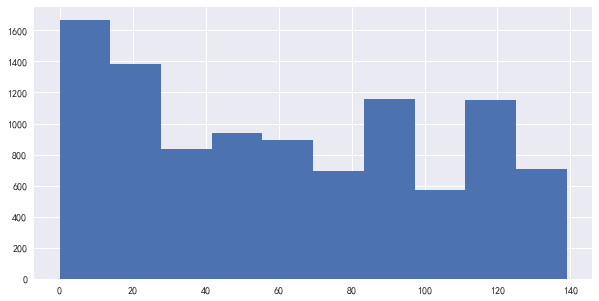

In [84]:
data['city'].hist(figsize=(10,5))

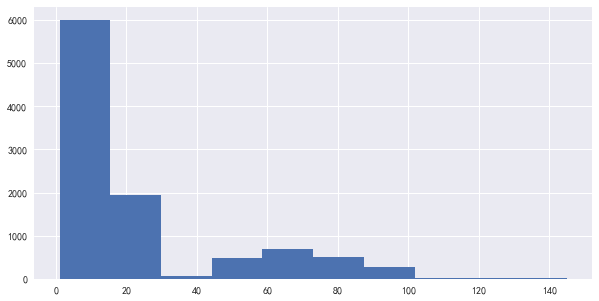

In [85]:
"""['age', 'xaccount_age', 'cred_limit',
       'this_bill_rate', 'this_bill_mp', 'last_mp_days', 'six_bill_num',
       'six_bill_avg_amt', 'six_cycle_mp_num', 'six_cycle_mp_avg_amt',
       'six_bill_avg_debt_rate', 'six_bill_low_repay_num', 'epp_nbr_12m',
       'alop_nbr_12m', 'epp_avg_amt_12m', 'alop_avg_amt_12m',
       'consume_num_session12', 'consume_num_session6', 'consume_num_session3',
       'consume_num_session', 'consume_amt_session12', 'consume_amt_session6',
       'consume_amt_session3', 'consume_amt_session', 'month_avg_use_year',
       'month_avg_use_month6', 'month_avg_use_month3']
"""
data['xaccount_age'].hist(figsize=(10,5))

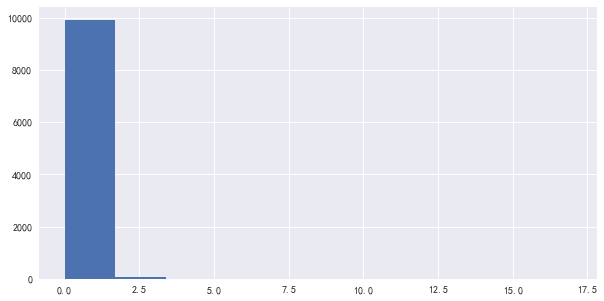

In [86]:
"""['age', 'xaccount_age', 'cred_limit',
       'this_bill_rate', 'this_bill_mp', 'last_mp_days', 'six_bill_num',
       'six_bill_avg_amt', 'six_cycle_mp_num', 'six_cycle_mp_avg_amt',
       'six_bill_avg_debt_rate', 'six_bill_low_repay_num', 'epp_nbr_12m',
       'alop_nbr_12m', 'epp_avg_amt_12m', 'alop_avg_amt_12m',
       'consume_num_session12', 'consume_num_session6', 'consume_num_session3',
       'consume_num_session', 'consume_amt_session12', 'consume_amt_session6',
       'consume_amt_session3', 'consume_amt_session', 'month_avg_use_year',
       'month_avg_use_month6', 'month_avg_use_month3']
"""
data['this_bill_rate'].hist(figsize=(10,5))

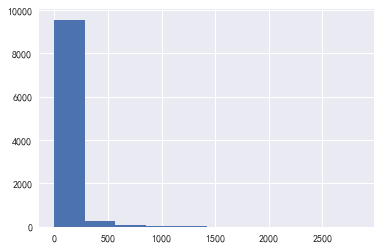

In [89]:
"""['age', 'xaccount_age', 'cred_limit',
       'this_bill_rate', 'this_bill_mp', 'last_mp_days', 'six_bill_num',
       'six_bill_avg_amt', 'six_cycle_mp_num', 'six_cycle_mp_avg_amt',
       'six_bill_avg_debt_rate', 'six_bill_low_repay_num', 'epp_nbr_12m',
       'alop_nbr_12m', 'epp_avg_amt_12m', 'alop_avg_amt_12m',
       'consume_num_session12', 'consume_num_session6', 'consume_num_session3',
       'consume_num_session', 'consume_amt_session12', 'consume_amt_session6',
       'consume_amt_session3', 'consume_amt_session', 'month_avg_use_year',
       'month_avg_use_month6', 'month_avg_use_month3']
"""
data[ 'consume_num_session12'].hist()

In [10]:
"""['age', 'xaccount_age', 'cred_limit',
       'this_bill_rate', 'this_bill_mp', 'last_mp_days', 'six_bill_num',
       'six_bill_avg_amt', 'six_cycle_mp_num', 'six_cycle_mp_avg_amt',
       'six_bill_avg_debt_rate', 'six_bill_low_repay_num', 'epp_nbr_12m',
       'alop_nbr_12m', 'epp_avg_amt_12m', 'alop_avg_amt_12m',
       'consume_num_session12', 'consume_num_session6', 'consume_num_session3',
       'consume_num_session', 'consume_amt_session12', 'consume_amt_session6',
       'consume_amt_session3', 'consume_amt_session', 'month_avg_use_year',
       'month_avg_use_month6', 'month_avg_use_month3']
"""
plt.figure()

#data[ 'month_avg_use_month3'].hist()
data.hist('month_avg_use_month3',ax=(1,1))

ValueError: The number of passed axes must be 1, the same as the output plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001872610EE10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000018727F83BE0>]], dtype=object)

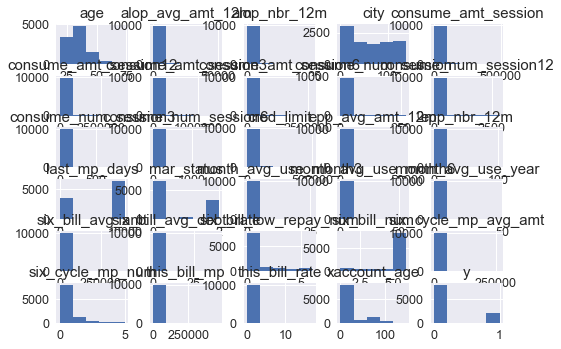

In [13]:
plt.figure(figsize=(20,16))
data.hist(bins=5)

In [91]:
#检验特征是否是正态分布 使用ks检验
https://www.cnblogs.com/shengyang17/p/9644431.html
from scipy import stats
# scipy包是一个高级的科学计算库，它和Numpy联系很密切，Scipy一般都是操控Numpy数组来进行科学计算
# .kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
# 结果返回两个值：statistic → D值，pvalue → P值
# p值（pvalue）大于0.05，为正态分布

#df = pd.DataFrame(data, columns =['value'])
u = data['six_cycle_mp_avg_amt'].mean()  # 计算均值
std = data['six_cycle_mp_avg_amt'].std()  # 计算标准差
stats.kstest(data['six_cycle_mp_avg_amt'], 'norm', (u, std))


KstestResult(statistic=0.40229168631408735, pvalue=0.0)

In [96]:
data[data['six_bill_avg_amt']<0]['six_bill_avg_amt']

562     -992.22
624    -1163.34
759    -9002.15
765     -184.76
2061    -534.89
4238    -662.84
4393   -5571.53
4763   -6964.07
5394   -1153.06
5854   -1736.28
6073    -851.21
7966    -112.10
8505    -217.57
8764    -677.36
9993    -658.03
Name: six_bill_avg_amt, dtype: float64

In [97]:
data[data['six_bill_avg_debt_rate']<0]['six_bill_avg_debt_rate']

562    -0.330740
624    -0.218126
759    -0.720172
765    -0.012317
2061   -0.116703
4238   -0.345830
4393   -1.114306
4763   -1.440842
5394   -0.138367
5854   -0.416707
6073   -0.154765
7966   -0.022420
8505   -0.090029
8764   -0.032513
9993   -0.049352
Name: six_bill_avg_debt_rate, dtype: float64

In [98]:
data[data['six_bill_avg_debt_rate']<0]['six_bill_avg_debt_rate']=0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [99]:
data

,y,city,mar_status,age,xaccount_age,cred_limit,this_bill_rate,this_bill_mp,last_mp_days,six_bill_num,...,consume_num_session6,consume_num_session3,consume_num_session,consume_amt_session12,consume_amt_session6,consume_amt_session3,consume_amt_session,month_avg_use_year,month_avg_use_month6,month_avg_use_month3
0,0.0,52.0,0.0,32.0,10.0,20000.0,0.162971,1213.15,15.0,6.0,...,17.0,12.0,2.0,70173.00,29294.00,16773.00,1249.00,0.350865,0.244117,0.279550
1,0.0,84.0,2.0,28.0,17.0,2500.0,0.000000,2165.66,9999.0,6.0,...,15.0,3.0,0.0,19515.38,3475.60,3130.88,0.00,0.661538,0.231707,0.417451
2,0.0,35.0,0.0,34.0,17.0,28500.0,0.792989,21336.18,9999.0,6.0,...,96.0,47.0,15.0,206655.62,114284.77,78978.75,22600.20,0.731524,0.703291,0.923728
3,0.0,40.0,0.0,28.0,17.0,5000.0,1.001600,4668.30,9999.0,6.0,...,37.0,15.0,5.0,227540.00,87870.00,14900.00,5000.00,0.948083,0.976333,0.993333
4,0.0,21.0,2.0,26.0,19.0,60000.0,0.990300,56447.10,9999.0,6.0,...,70.0,57.0,40.0,549835.93,290014.88,176430.00,59418.00,0.872755,0.878833,0.980167
5,0.0,1.0,1.0,36.0,138.0,46000.0,0.418607,12171.30,17.0,6.0,...,50.0,9.0,4.0,361647.76,197082.29,106119.00,28091.00,0.655159,0.714066,0.768978
6,0.0,68.0,2.0,27.0,62.0,117500.0,0.384213,42886.73,9999.0,6.0,...,49.0,28.0,6.0,371996.50,229952.50,121303.20,45121.00,0.315251,0.326174,0.344123
7,0.0,44.0,0.0,32.0,8.0,2000.0,0.611850,1161.67,9999.0,5.0,...,11.0,6.0,4.0,3589.81,3589.81,1693.00,1223.70,0.358981,0.358981,0.282167
8,0.0,19.0,0.0,53.0,87.0,80000.0,0.706950,50905.36,193.0,6.0,...,16.0,14.0,4.0,208787.00,152922.00,140842.00,53565.00,0.217486,0.318588,0.586842
9,0.0,1.0,1.0,48.0,18.0,31000.0,0.629342,18354.66,9999.0,6.0,...,120.0,78.0,40.0,145245.50,96265.33,50808.83,19331.85,0.424694,0.517556,0.546332


In [100]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
y,10000.0,0.199500,0.399644,0.000000,0.000000,0.000000,0.000000,1.000000e+00
city,10000.0,60.699400,42.824365,0.000000,18.000000,57.000000,96.000000,1.390000e+02
mar_status,10000.0,0.675400,0.929796,0.000000,0.000000,0.000000,2.000000,2.000000e+00
age,10000.0,33.778400,7.950498,19.000000,28.000000,32.000000,38.000000,7.400000e+01
xaccount_age,10000.0,23.422200,26.014358,1.000000,7.000000,14.000000,23.000000,1.450000e+02
cred_limit,10000.0,28197.198900,36234.316972,1.000000,6500.000000,18000.000000,35000.000000,5.000000e+05
this_bill_rate,10000.0,0.482938,0.479739,0.000000,0.111086,0.386447,0.835856,1.697924e+01
this_bill_mp,10000.0,10328.012341,16418.660196,0.000000,1613.560000,4692.610000,13298.132500,4.669180e+05
last_mp_days,10000.0,6500.546500,4668.516588,1.000000,272.000000,9999.000000,9999.000000,9.999000e+03
six_bill_num,10000.0,5.258700,1.485932,1.000000,5.000000,6.000000,6.000000,6.000000e+00
